In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
import importlib

In [2]:
# from naive_implementation.precision_recall import plot_precision as native_precision, plot_recall as native_recall
# from using_kde.precision_recall import plot_precision as kde_precision, plot_recall as kde_recall
# from using_fastkde.precision_recall import plot_precision as fast_precision, plot_recall as fast_recall

In [17]:
import naive_implementation.precision_recall as naive_precision_recall
import using_kde.precision_recall as kde_precision_recall
import using_fastkde.precision_recall as fast_precision_recall

importlib.reload(naive_precision_recall)
importlib.reload(kde_precision_recall)
importlib.reload(fast_precision_recall)

native_precision, native_recall = naive_precision_recall.plot_precision, naive_precision_recall.plot_recall
kde_precision, kde_recall = kde_precision_recall.plot_precision, kde_precision_recall.plot_recall
fast_precision, fast_recall = fast_precision_recall.plot_precision, fast_precision_recall.plot_recall

plot_pdf = kde_precision_recall.plot_pdf

del naive_precision_recall
del kde_precision_recall
del fast_precision_recall

Loading dataset

In [4]:
iris = datasets.load_iris().data
iris_features = iris[:, 2]
iris_values = iris[:, 3]
features_train, features_test, values_train, values_test = train_test_split(iris_features, iris_values, test_size=0.33)

Строим срез (petal length, petal width). Просматривается линейная зависимость

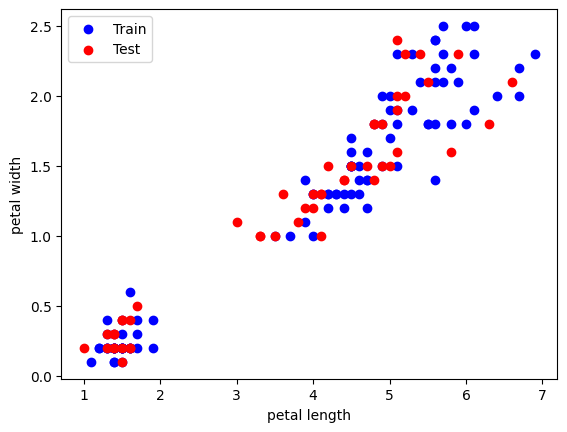

In [5]:
plt.scatter(features_train, values_train, c='b', label='Train')
plt.scatter(features_test,  values_test,  c='r', label='Test')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

Обучаем линейную модель. petal width = f(petal length).

In [6]:
reg = LinearRegression().fit(features_train.reshape((-1, 1)), values_train)
reg.score(features_test.reshape((-1, 1)), values_test)

0.9076207414667731

Строим срез (petal length, petal width) c учётом предсказанных значений

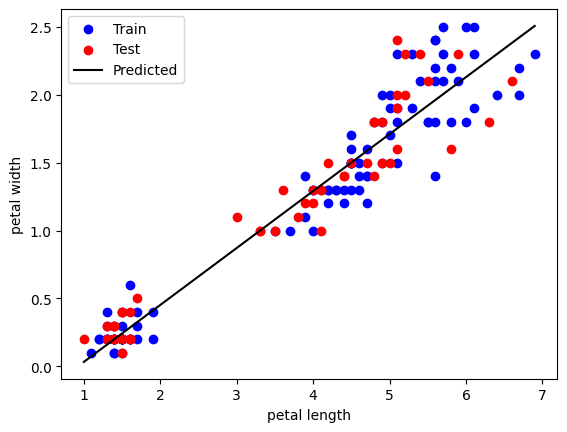

In [7]:
plt.scatter(features_train, values_train, c='b')
plt.scatter(features_test,  values_test,  c='r')
plt.xlabel('petal length')
plt.ylabel('petal width')
args = np.linspace(np.min(iris_features), np.max(iris_features), 100)
plt.plot(args, reg.predict(args.reshape((-1, 1))), c='k')
plt.legend(["Train", "Test", "Predicted"])
del args

Тестируем функции plot_precision, plot_recall на полученной модели

In [8]:
y_act = iris_values
y_pred = reg.predict(iris_features.reshape(-1, 1))

In [9]:
import pickle
path = 'data.bin'
with open(path, "wb") as f:
    pickle.dump(np.vstack((y_act, y_pred)), f)

In [10]:
y_pred

array([0.19984781, 0.19984781, 0.15789655, 0.24179907, 0.19984781,
       0.32570159, 0.19984781, 0.24179907, 0.19984781, 0.24179907,
       0.24179907, 0.28375033, 0.19984781, 0.07399403, 0.11594529,
       0.24179907, 0.15789655, 0.19984781, 0.32570159, 0.24179907,
       0.32570159, 0.24179907, 0.03204277, 0.32570159, 0.40960411,
       0.28375033, 0.28375033, 0.24179907, 0.19984781, 0.28375033,
       0.28375033, 0.24179907, 0.24179907, 0.19984781, 0.24179907,
       0.11594529, 0.15789655, 0.19984781, 0.15789655, 0.24179907,
       0.15789655, 0.15789655, 0.15789655, 0.28375033, 0.40960411,
       0.19984781, 0.28375033, 0.19984781, 0.24179907, 0.19984781,
       1.58423939, 1.50033687, 1.66814191, 1.29058057, 1.54228813,
       1.50033687, 1.58423939, 0.99692175, 1.54228813, 1.24862931,
       1.08082427, 1.37448309, 1.29058057, 1.58423939, 1.12277553,
       1.45838561, 1.50033687, 1.33253183, 1.50033687, 1.24862931,
       1.62619065, 1.29058057, 1.66814191, 1.58423939, 1.41643

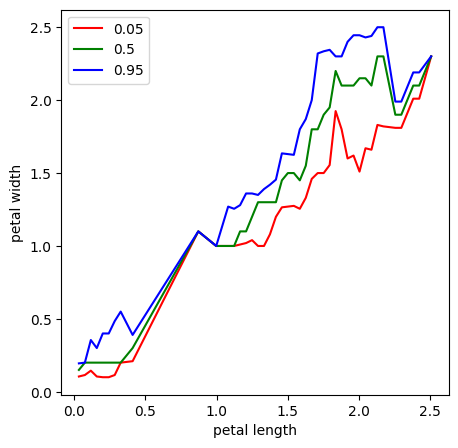

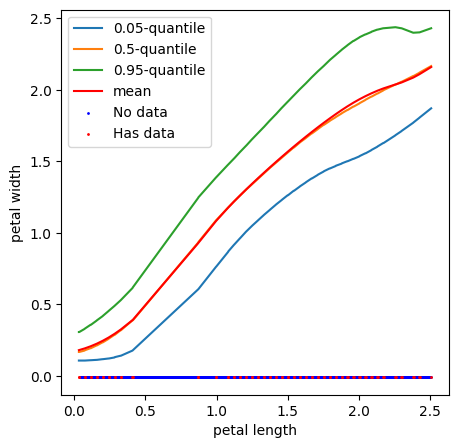

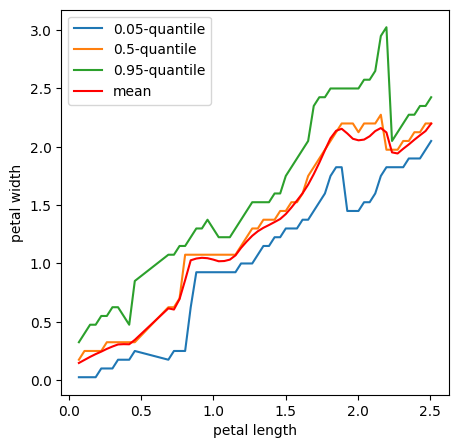

In [18]:
figures = [plt.figure() for _ in range(3)]
for figure in figures:
    figure.subplots(1, 1)
    figure.set_figwidth(5)
    figure.set_figheight(5)
    figure.axes[0].set_xlabel('petal length')
    figure.axes[0].set_ylabel('petal width')
axes = [figure.axes[0] for figure in figures]

native_precision(y_act, y_pred, plt_mode='raw', quantiles=[0.05, 0.5, 0.95], ax=axes[0])
kde_precision(y_act, y_pred, plt_mode='raw', quantiles=[0.05, 0.5, 0.95], ax=axes[1], resolution=1_000)
fast_precision(y_act, y_pred, plt_mode='raw', quantiles=[0.05, 0.5, 0.95], ax=axes[2])

<Axes: >

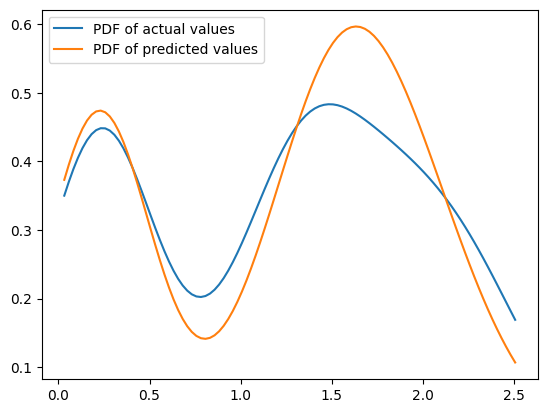

In [12]:
plot_pdf(y_act, y_pred)

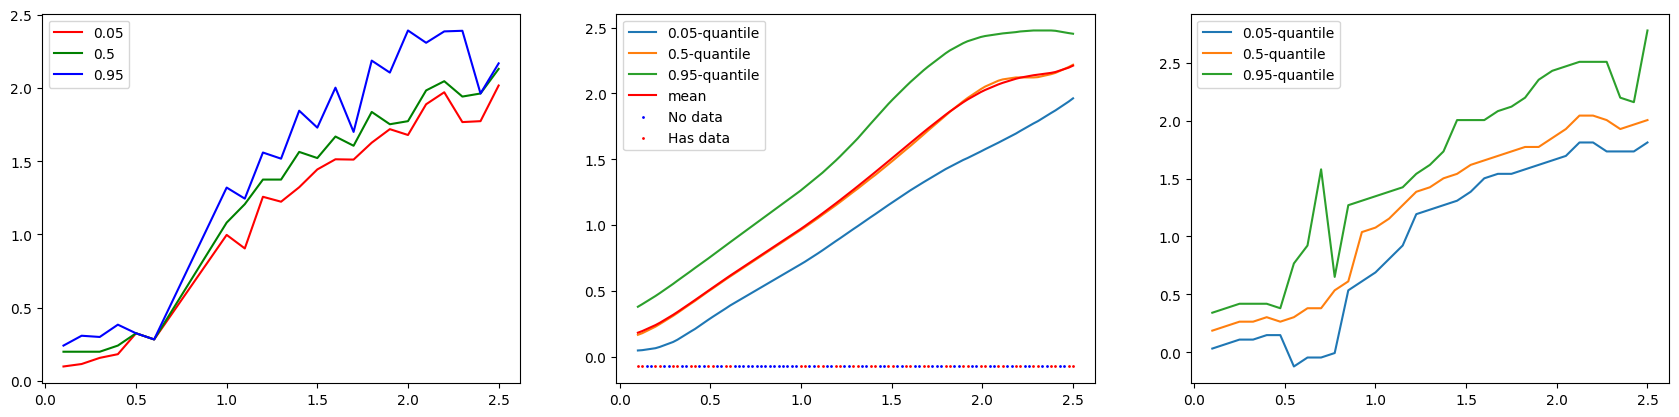

In [13]:
fig, axes = plt.subplots(1, 3)
fig.set_figwidth(21)
native_recall(y_act, y_pred, plt_mode='raw', quantiles=[0.05, 0.5, 0.95], ax=axes[0])
kde_recall(y_act, y_pred, plt_mode='raw', quantiles=[0.05, 0.5, 0.95], ax=axes[1])
fast_recall(y_act, y_pred, plt_mode='raw', quantiles=[0.05, 0.5, 0.95], ax=axes[2])

In [14]:
from scipy import stats

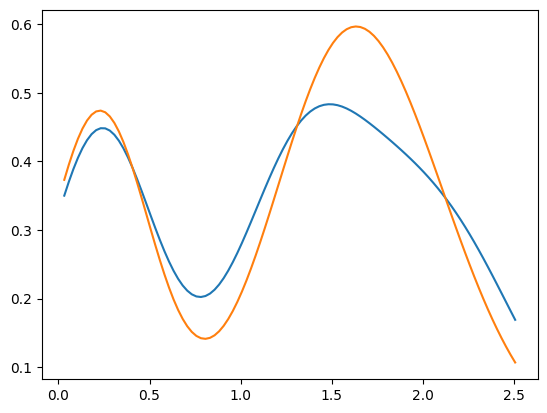

In [15]:
resolution = 100
arg_sp = np.linspace(min(np.min(y_act), np.min(y_pred)), max(np.max(y_act), np.max(y_pred)), num=resolution)
act_kde = stats.gaussian_kde(y_act, bw_method='scott').evaluate(arg_sp)
pred_kde = stats.gaussian_kde(y_pred, bw_method='scott').evaluate(arg_sp)

plt.plot(arg_sp, act_kde,  label="PDF of actual values")
plt.plot(arg_sp, pred_kde, label="PDF of predicted values")

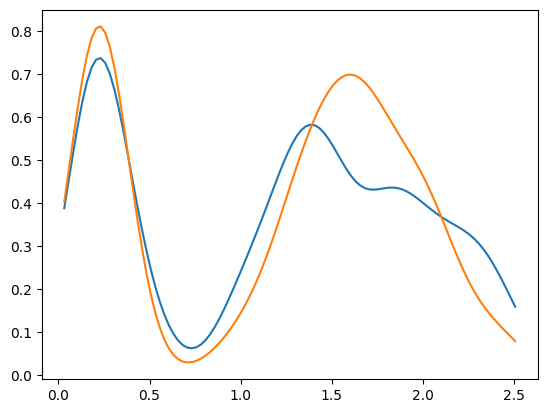

In [16]:
resolution = 100
arg_sp = np.linspace(min(np.min(y_act), np.min(y_pred)), max(np.max(y_act), np.max(y_pred)), num=resolution)
act_kde = stats.gaussian_kde(y_act, bw_method=0.2).evaluate(arg_sp)
pred_kde = stats.gaussian_kde(y_pred, bw_method=0.2).evaluate(arg_sp)

plt.plot(arg_sp, act_kde,  label="PDF of actual values")
plt.plot(arg_sp, pred_kde, label="PDF of predicted values")